# Predicting Heart Disease using Supervised Learning - Classification Algorithms
    
Description
    
* Context: This task is to predict occurance of a heart disease, based on given predictors. 
* The tasks involves, EDA, data pre-processing, model building and model evalation. 
* The following supervised Classification algorithms are used and evauated. 
 
    * K Neighbors (KNN)
    * Support Vector Machine (SVC)
    * Gaussian Process Classifier
    * Decision Tree Classifier
    * Random Forest Classifier
    * MLP Classifier
    * Ada Boost Classifier
    * Gaussian NB
    * Quadratic Discriminant Analysis


In [178]:
import os
import numpy as np 
import pandas as pd 

# Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Libraries for Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier

# Libraries for Metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [179]:
# Reading the data set
data = pd.read_csv('Predicting-Heart-Disease/heart.csv')
data.describe().T.style.background_gradient(cmap='Blues')

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [181]:
print("Number of rows in the dataset: {}".format(data.shape[0]))
print("Number of cols in the dataset: {}".format(data.shape[1]))

Number of rows in the dataset: 918
Number of cols in the dataset: 12


In [182]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [183]:
#EDA 
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [184]:
data[data['Cholesterol'] == 0].count()

Age               172
Sex               172
ChestPainType     172
RestingBP         172
Cholesterol       172
FastingBS         172
RestingECG        172
MaxHR             172
ExerciseAngina    172
Oldpeak           172
ST_Slope          172
HeartDisease      172
dtype: int64

In [185]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [186]:
import pandas_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


<ipython-input-187-34c3a8998837>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


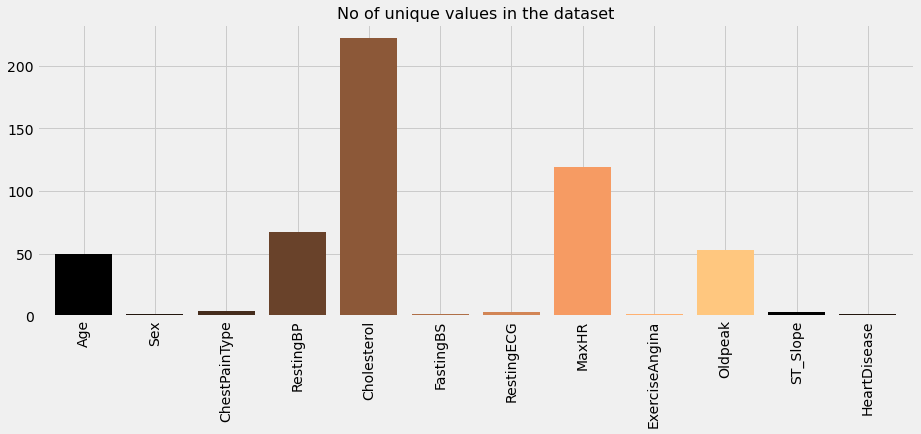

In [187]:
#Cardinality of data 
color = plt.cm.copper(np.linspace(0, 1, 10))
plt.figure(figsize=(14,5))
data.nunique().plot(kind='bar', width=.8, color=color)
plt.title('No of unique values in the dataset', size=16)
plt.show()
print(data.nunique())

In [188]:
#Seperating the data into discrette features and continuous feat
discrette_feature = [i for i in data.columns if data[i].nunique() < 10]
continuous_feature = [i for i in data.columns if data[i].nunique() > 10]
print(f'discrette feature: {discrette_feature}')
print(f'continuous feature: {continuous_feature}')

discrette feature: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
continuous feature: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [189]:
#data['Cholesterol'] = data['Cholesterol'].mask(data['Cholesterol']==0).fillna(data['Cholesterol'].mean())


#Data Preprocessing
#FastingBS (to categorical variable)
#discrette_feature.append('FastingBS')
#continuous_feature.remove('FastingBS')
print('categorical : ', discrette_feature, 'numerical : ', continuous_feature)

#Outlier drop
def outlier(data):
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    min_bound, max_bound = Q1 - IQR * 1.5, Q3 + IQR * 1.5
    return min_bound, max_bound
min_b, max_b = outlier(data['RestingBP'])
data.iloc[data.loc[data['RestingBP'] < min_b].index]
#data.drop(index = [449], axis = 0, inplace = True)


'''#Age Groupping
print(x_data['Age'].min(), x_data['Age'].max())
x, bins = np.histogram(x_data['Age'], bins = 7)
label_names = [10,20,30,40,50,60,70]
data['Age'] = pd.cut(data['Age'], bins = bins, labels = label_names, include_lowest = True)'''




categorical :  ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'] numerical :  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


"#Age Groupping\nprint(x_data['Age'].min(), x_data['Age'].max())\nx, bins = np.histogram(x_data['Age'], bins = 7)\nlabel_names = [10,20,30,40,50,60,70]\ndata['Age'] = pd.cut(data['Age'], bins = bins, labels = label_names, include_lowest = True)"

<ipython-input-190-355755b74836>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


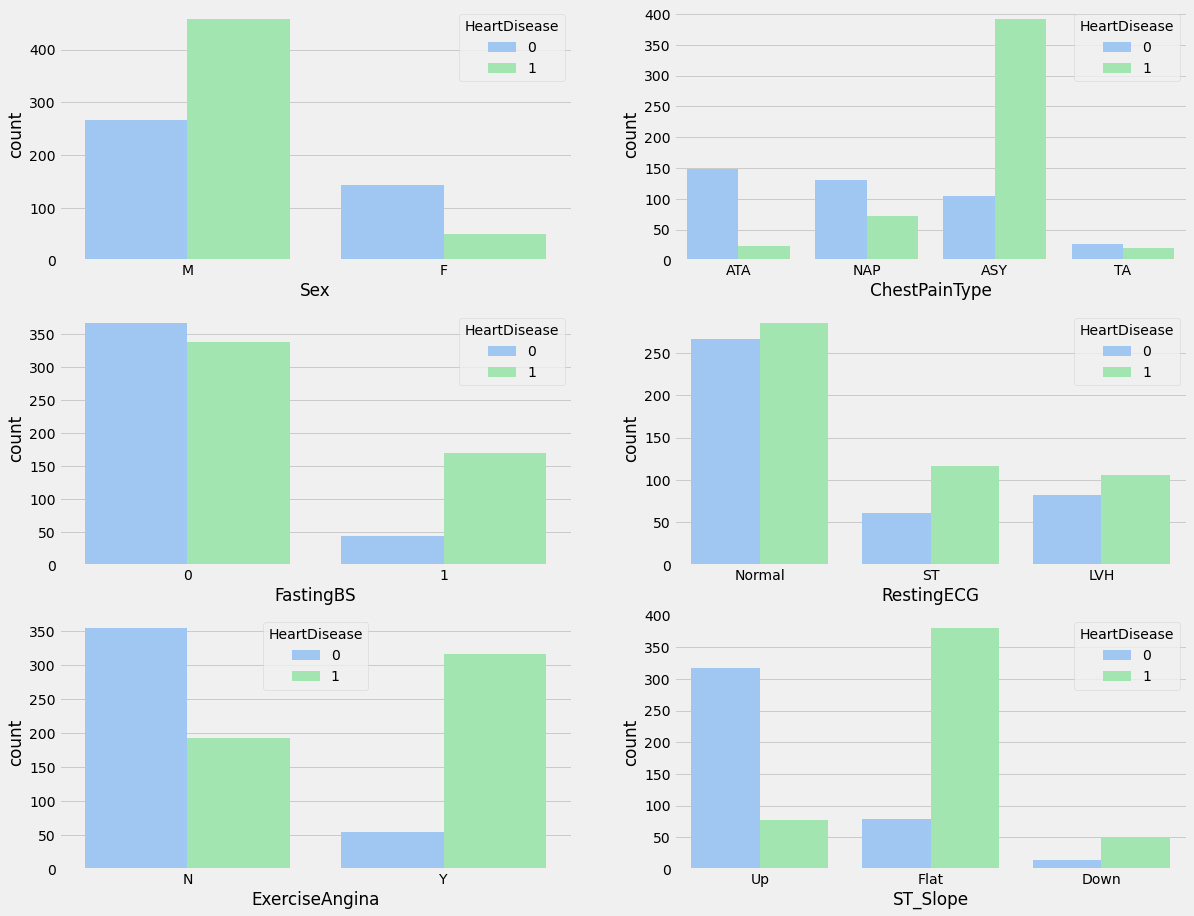

In [190]:
plt.style.use(plt.style.available[19])
i = 1
plt.figure(figsize=(18,20)) 
for feature in discrette_feature[:-1]:
    plt.subplot(4, 2, i)
    sns.countplot(x=data[feature], hue=data.HeartDisease)
    i += 1
    
plt.show()

📌Insights: Sex: Male is having more heart disease compared to female
Chest pain type ASY: Asymptomatic having more heart disease compared to others
exercise-induced angina: yes and ST_Slope: Flat is having more compared to others
And peoples with ST_Slope: up, ExerciseAngina: No and chest pain type: ATA (ATypical angina) mostly don't have heart disease

visualising continuous features with output variable using histogram and kde

<ipython-input-191-5c9a5aa8b197>:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


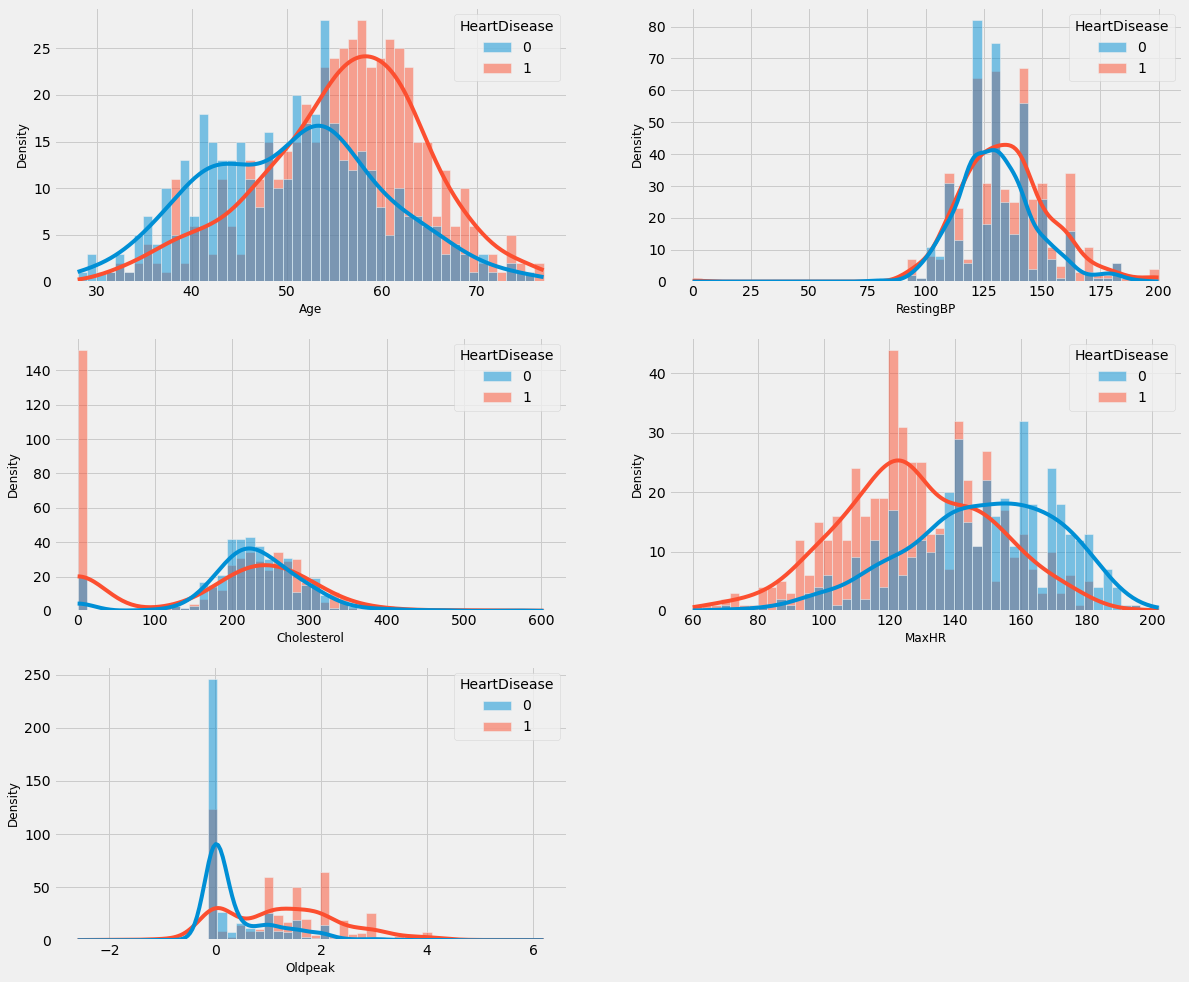

In [191]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    sns.histplot(x=data[feature],kde=True,bins=50, hue=data.HeartDisease)
    plt.xlabel(feature,size=12)
    plt.ylabel("Density",size=12)
    i += 1
    
plt.show()

📌Insights : people who are aged more than 50 and having MaxHR (maximum Heart Rate) less than 140 and also have more Oldpeak is more likely to have heart disease.

visualising continuous features with each other using scatter plot

<ipython-input-157-66e6081f5b3d>:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


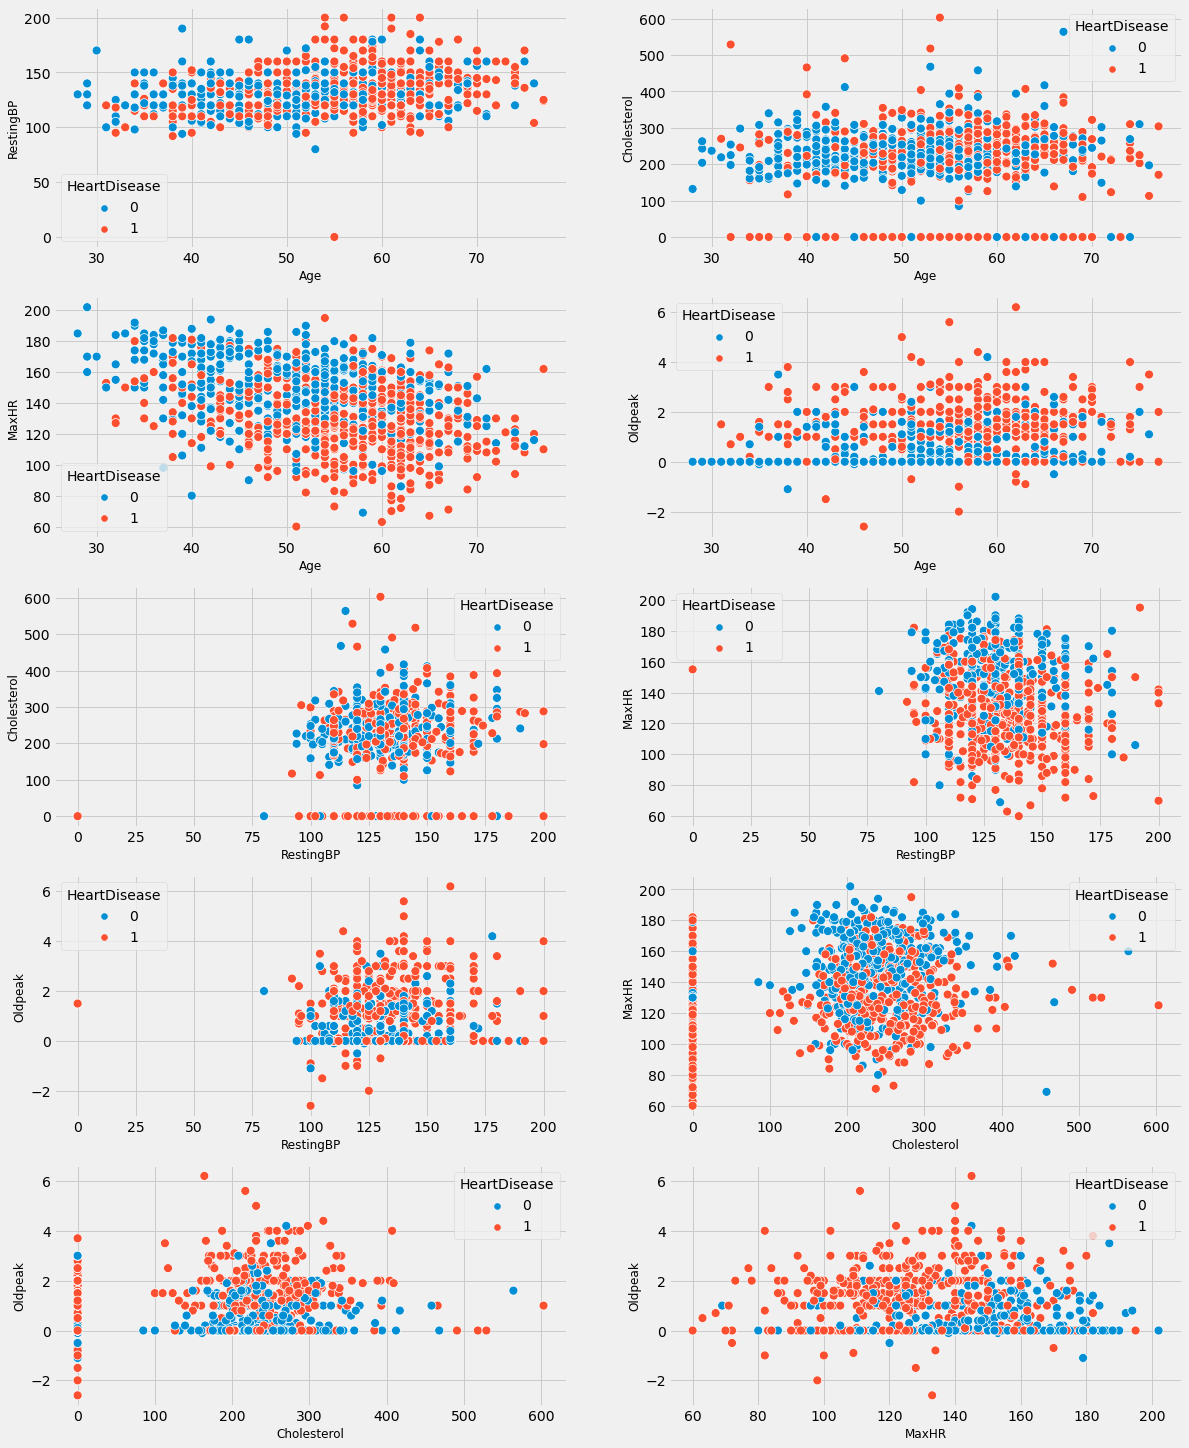

In [157]:
i = 1
n = 1
plt.figure(figsize=(18,24)) 
for feature in continuous_feature:
    for i_ in continuous_feature[n:]:
        plt.subplot(5, 2, i)
        sns.scatterplot(x=data[feature],y=data[i_], s=80, hue=data.HeartDisease)
        plt.xlabel(feature,size=12)
        plt.ylabel(i_,size=12)
        i += 1
    n+=1
plt.show() 

<ipython-input-192-7a94edfd9db9>:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


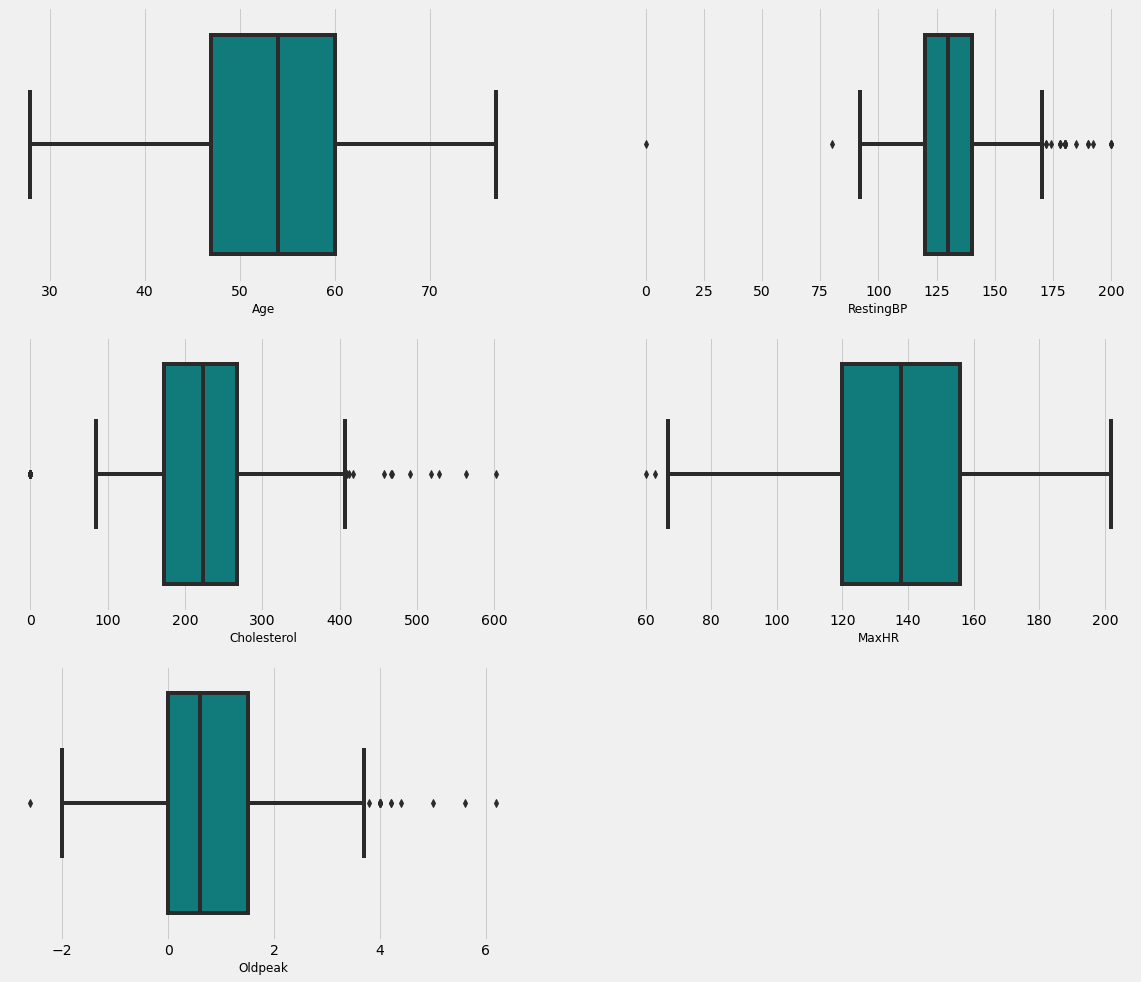

In [192]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, x=feature, hue='HeartDisease', color='darkcyan')
    plt.xlabel(feature,size=12)
#     plt.ylabel("Density",size=12)
    i += 1
    
plt.show()

<ipython-input-193-1d6d4f45b737>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


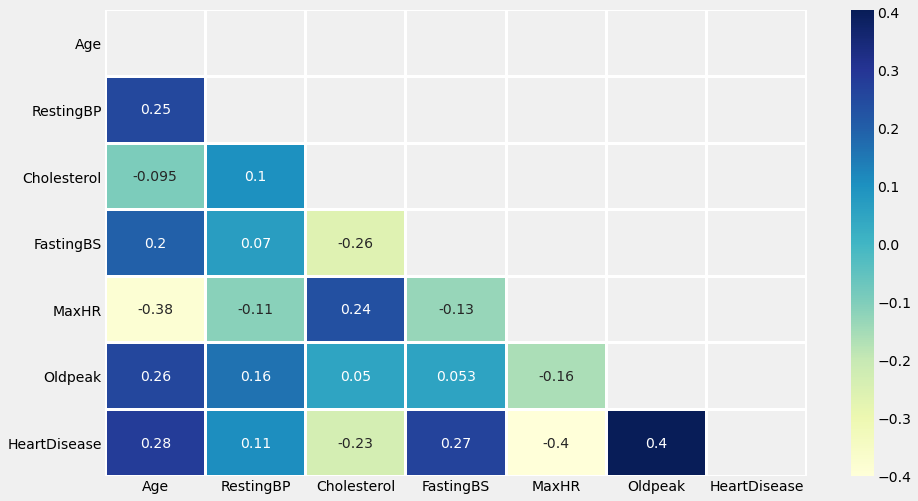

In [193]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), mask=np.triu(data.corr()), annot=True, cmap='YlGnBu',linewidth=2)
plt.show()

📌Insights : Oldpeak and Heart Disease have strong positive correlation, whereas maxHR (maximum Heart Rate) and Age have negative correlation (younger people have more heart rate compared to older people)

Data Preprocessing

In [160]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

seperating input features and output features

In [194]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [195]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape: (734, 11)
y_train shape: (734,)
x_test shape : (184, 11)
y_test shape : (184,)


Applying One Hot Encoding and standardization using column transformer

In [196]:
transformer = ColumnTransformer(transformers = [('onehot', OneHotEncoder(sparse=False, drop='first'), [1,2,6,8,10]),
                                                ('scaler', StandardScaler(), [0,3,4,5,7,9])],
                                      remainder = 'passthrough')
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

Model Building

In [165]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [202]:
def do_prediction(classifier):
    
    # training the classifier on the dataset
    classifier.fit(x_train, y_train)
    
    #Do prediction and evaluting the prediction
    prediction = classifier.predict(x_test)
    cross_validation_score = cross_val(x_train,y_train, classifier)
    accuracy = accuracy_score(y_test, prediction)
    con_metrix = confusion_matrix(y_test, prediction)
    
    return accuracy,con_metrix, cross_validation_score

def cross_val(x_train, y_train, classifier):
    
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
    return accuracies.mean()

Logistic Regression

Logistic Regression Performace on the training data have an accuracy score of 87.0
Logistic Regression Performace on the testing data have an accuracy score of 87.0


<ipython-input-203-a3773641cbfc>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


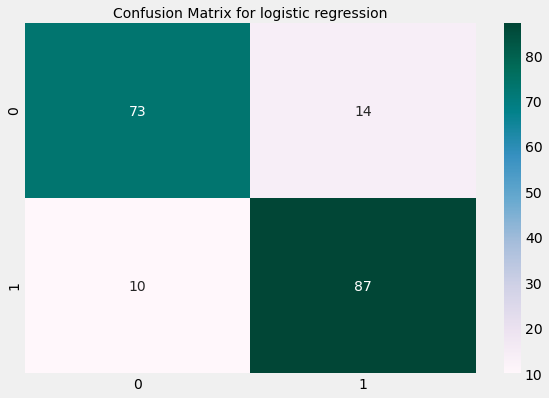

In [203]:
#92, 87 
logistic_reg = LogisticRegression()
accuracy,con_metrix, cross_validation_score = do_prediction(logistic_reg)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for logistic regression',size=14)
plt.show()
print('Logistic Regression Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Logistic Regression Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

Naive Bayes

Naive Bayes Performace on the training data have an accuracy score of 86.0
Naive Bayes Performace on the testing data have an accuracy score of 84.0


<ipython-input-204-95e346ef1869>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


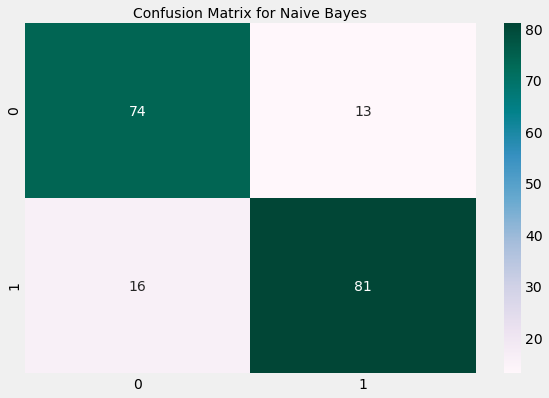

In [204]:
#90, 84
gaussian = GaussianNB()
accuracy,con_metrix, cross_validation_score = do_prediction(gaussian)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for Naive Bayes',size=14)
plt.show()
print('Naive Bayes Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Naive Bayes Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

Support Vector Machine

Support Vector Machine Performace on the training data have an accuracy score of 87.0
Support Vector Machine Performace on the testing data have an accuracy score of 88.0


<ipython-input-205-464172ac9a04>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


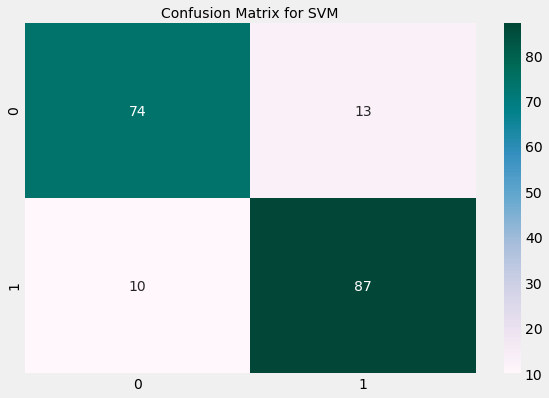

In [205]:
svm = SVC()
accuracy,con_metrix, cross_validation_score = do_prediction(svm)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for SVM',size=14)
plt.show()
print('Support Vector Machine Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Support Vector Machine Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

Deciosn tree

Decision tree Performace on the training data have an accuracy score of 83.0
Decision tree Performace on the testing data have an accuracy score of 88.0


<ipython-input-206-530c494a1660>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


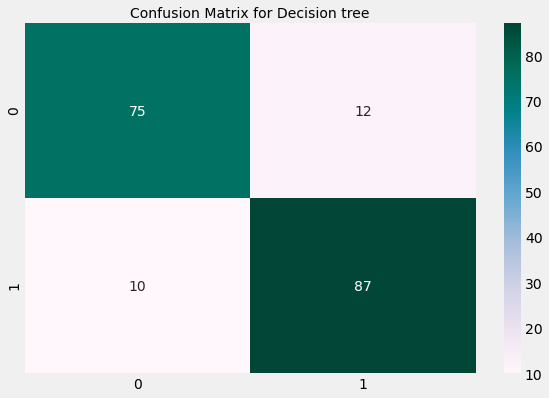

In [206]:
dtc = DecisionTreeClassifier(max_depth=5)
accuracy,con_metrix, cross_validation_score = do_prediction(dtc)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for Decision tree',size=14)
plt.show()
print('Decision tree Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Decision tree Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

In [41]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

Random Forest Performace on the training data have an accuracy score of 85.0
RandomForest  Performace on the testing data have an accuracy score of 87.0


<ipython-input-207-ebe08521cace>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


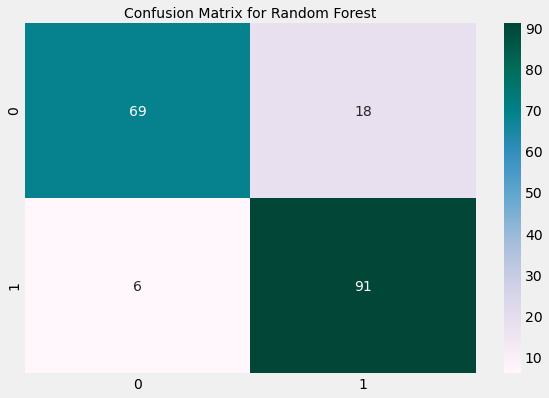

In [207]:
accuracy,con_metrix, cross_validation_score = do_prediction(rfc)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for Random Forest',size=14)
plt.show()
print('Random Forest Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('RandomForest  Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

In [209]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
#mlp = MLPClassifier(solver='lbfgs', alpha=1e-08,hidden_layer_sizes=(60,),activation='logistic', random_state=(2),)

MLP classifier Performace on the training data have an accuracy score of 86.0
MLP classifier Performace on the testing data have an accuracy score of 88.0


<ipython-input-210-7c0615f854ec>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


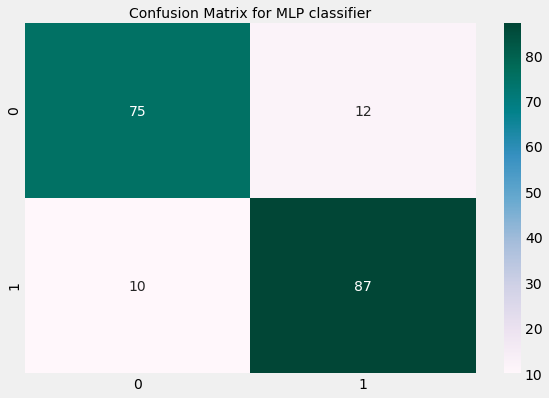

In [210]:
accuracy,con_metrix, cross_validation_score = do_prediction(mlp)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for MLP classifier',size=14)
plt.show()
print('MLP classifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('MLP classifier Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

In [211]:
ada = AdaBoostClassifier()

Ada Boost classifier Performace on the training data have an accuracy score of 85.0
Ada Boost classifier Performace on the testing data have an accuracy score of 86.0


<ipython-input-212-fb6557c6928f>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


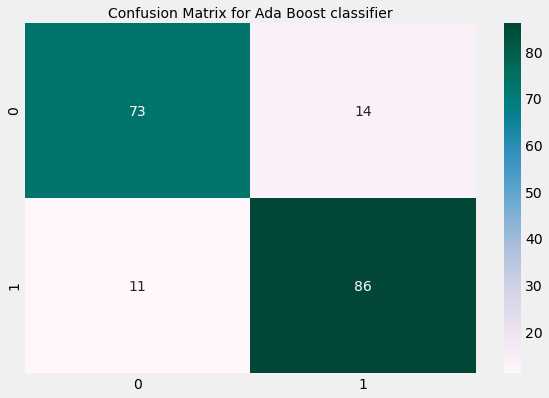

In [212]:
accuracy,con_metrix, cross_validation_score = do_prediction(ada)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for Ada Boost classifier',size=14)
plt.show()
print('Ada Boost classifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Ada Boost classifier Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

In [52]:
qda = QuadraticDiscriminantAnalysis()

Quadratic Discriminant Analysis classifier Performace on the training data have an accuracy score of 84.0
Quadratic Discriminant Analysis classifier Performace on the testing data have an accuracy score of 85.0


<ipython-input-213-1a729ef2167b>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


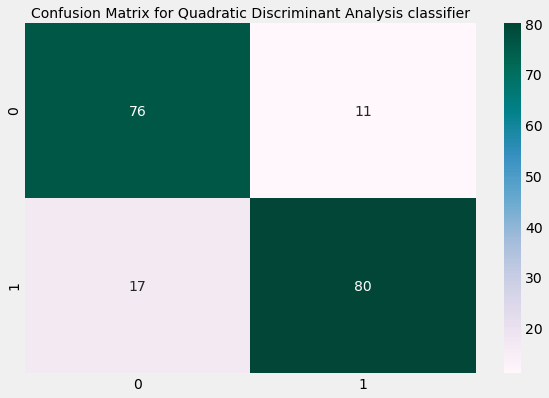

In [213]:
accuracy,con_metrix, cross_validation_score = do_prediction(qda)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for Quadratic Discriminant Analysis classifier',size=14)
plt.show()
print('Quadratic Discriminant Analysis classifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Quadratic Discriminant Analysis classifier Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

In [214]:
gpc = GaussianProcessClassifier(1.0 * RBF(1.0))

Gaussian Process Classifier Performace on the training data have an accuracy score of 87.0
Gaussian Process Classifier Performace on the testing data have an accuracy score of 88.0


<ipython-input-215-914727d84ef2>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


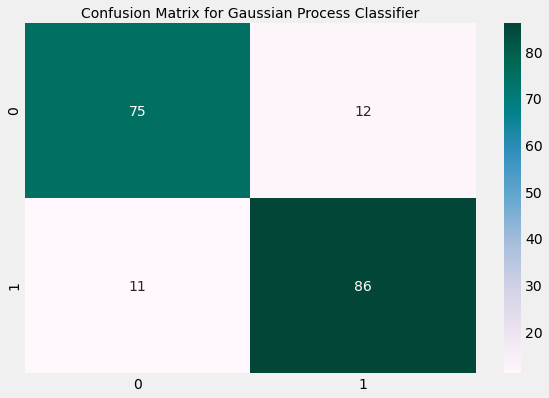

In [215]:
accuracy,con_metrix, cross_validation_score = do_prediction(gpc)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for Gaussian Process Classifier',size=14)
plt.show()
print('Gaussian Process Classifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Gaussian Process Classifier Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

In [216]:
knn = KNeighborsClassifier(3)

K Neighbors Classifier Performace on the training data have an accuracy score of 84.0
K Neighbors Classifier Performace on the testing data have an accuracy score of 86.0


<ipython-input-217-5a4e52104d77>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


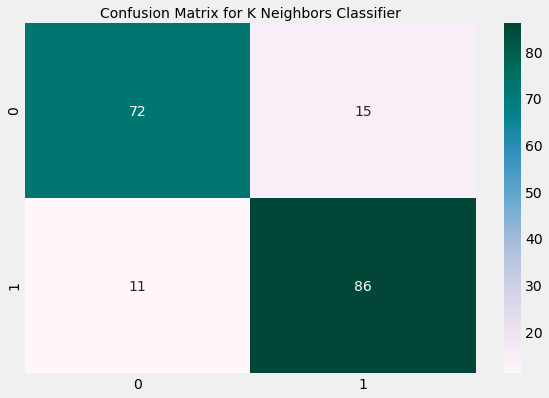

In [217]:
accuracy,con_metrix, cross_validation_score = do_prediction(knn)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for K Neighbors Classifier',size=14)
plt.show()
print('K Neighbors Classifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('K Neighbors Classifier Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )